# AICE Associate 자격인증 샘플문항

### Obesity Level Estimation 데이터 세트: 식습관과 신체 조건을 이용한 비만 수준 예측 문제

- 데이터 출처 : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

- 멕시코, 페루, 콜롬비아 개인들의 식습관과 신체 조건 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 비만 수준(7단계)을 예측하고 결과를 분석하세요.

---

### [유의사항]

- 각 문항의 답안코드는 반드시 `# 여기에 답안코드를 작성하세요` 로 표시된 cell에 작성해야 합니다.
- 제공된 시험문항 cell을 삭제하거나 답안 위치가 아닌 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
- 시험 중에는 상단의 '임시저장' 버튼을 클릭하여 저장을 해주시고, 답안 제출시에는 '최종제출' 버튼을 클릭해주시기 바랍니다.
- 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
- 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
- 자격인증 문제에 제공된 데이터는 제 3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.
- **오픈북 허용사이트에서만 참고 가능하며 그외 사이트 참고시 부정행위로 간주될수 있습니다.**

---

### [ 데이터 컬럼 설명 ]

**파일 1: obesity_personal.csv (개인 정보)**

* **ID** : 개인 식별 번호
* **Gender** : 성별 (Female, Male)
* **Age** : 나이 (연속형, 14-61세)
* **Height** : 키 (미터 단위)
* **Weight** : 체중 (킬로그램 단위)
* **family_history_with_overweight** : 가족 중 과체중 이력 (yes, no)
* **NObeyesdad** : 비만 수준
    - Insufficient_Weight (저체중)
    - Normal_Weight (정상 체중)
    - Overweight_Level_I (과체중 I)
    - Overweight_Level_II (과체중 II)
    - Obesity_Type_I (비만 I)
    - Obesity_Type_II (비만 II)
    - Obesity_Type_III (비만 III)

**파일 2: obesity_lifestyle.csv (생활습관 정보)**

* **ID** : 개인 식별 번호 (personal 파일과 매칭)
* **FAVC** : 고칼로리 음식 자주 섭취 여부 (yes, no)
* **FCVC** : 야채 섭취 빈도 (1: 낮음, 2: 보통, 3: 높음)
* **NCP** : 하루 주요 식사 횟수 (1~4회)
* **CAEC** : 식사 사이 간식 섭취 (no, Sometimes, Frequently, Always)
* **SMOKE** : 흡연 여부 (yes, no)
* **CH2O** : 일일 물 섭취량 (1: 1L 미만, 2: 1-2L, 3: 2L 이상)
* **SCC** : 칼로리 섭취 모니터링 여부 (yes, no)
* **FAF** : 주당 신체 활동 빈도 (0: 없음, 1: 1-2일, 2: 2-4일, 3: 4-5일)
* **TUE** : 기술 기기 사용 시간 (0: 0-2시간, 1: 3-5시간, 2: 5시간 이상)
* **CALC** : 알코올 섭취 빈도 (no, Sometimes, Frequently, Always)
* **MTRANS** : 주요 교통수단 (Automobile, Bike, Motorbike, Public_Transportation, Walking)



In [1]:
# 다음 코드를 실행하여 데이터 파일과 부속 파일을 다운로드 하세요.
import urllib.request

BASE = "https://raw.githubusercontent.com/metamath1/aicebook/main/ch05"

urllib.request.urlretrieve(f"{BASE}/ncls/obesity/obesity_personal.csv", "obesity_personal.csv")
urllib.request.urlretrieve(f"{BASE}/ncls/obesity/obesity_lifestyle.csv", "obesity_lifestyle.csv")
urllib.request.urlretrieve(f"{BASE}/aice_ans.py", "aice_ans.py")
urllib.request.urlretrieve(f"{BASE}/ncls/obesity/answer_config.json", "answer_config.json")

('answer_config.json', <http.client.HTTPMessage at 0x7de0c98c4fe0>)

## 기초정보 확인 및 시각화

1. 두 개의 csv 파일을 각각 읽어들이세요.
    - "obesity_personal.csv" 파일을 읽어 df_personal에 할당하세요.
    - "obesity_lifestyle.csv" 파일을 읽어 df_lifestyle에 할당하세요.
    - df_personal에서 family_history_with_overweight='yes'인 샘플의 비율을 계산하여 '답안01_1'에 대입하세요. (소수 둘째자리까지 반올림, 예: 0.65)
    - df_lifestyle에서 FAVC='yes'인 샘플의 개수를 '답안01_2'에 대입하세요.


In [22]:
# 여기에 답안코드를 작성하세요
import pandas as pd

df_personal = pd.read_csv("obesity_personal.csv")
df_lifestyle = pd.read_csv("obesity_lifestyle.csv")

답안01_1 = round((df_personal['family_history_with_overweight'] == 'yes').mean(), 2) # np.float64(0.79)
답안01_2 = (df_lifestyle['FAVC'] == 'yes').sum() # np.int64(1801)

#### 문제 1 해설

이 문제는 두 개의 CSV 파일을 읽어와 각각의 특정 조건을 만족하는 샘플 비율이나 개수를 계산하는 방법을 다룹니다.

먼저 pandas 라이브러리를 import하고, `read_csv()` 함수로 두 개의 파일을 각각 읽어옵니다. "obesity_personal.csv"는 개인 정보 데이터를, "obesity_lifestyle.csv"는 생활습관 데이터를 담고 있습니다.

첫 번째 답안은 df_personal에서 'family_history_with_overweight' 열이 'yes'인 샘플의 비율을 계산합니다. `df_personal['family_history_with_overweight'] == 'yes'`는 불리언 시리즈를 반환하고, `mean()` 메서드는 True를 1, False를 0으로 계산하여 평균을 구합니다. 이 평균값이 바로 'yes'의 비율입니다. `round()`로 소수점 둘째 자리까지 반올림하면 약 0.79가 나옵니다.

두 번째 답안은 df_lifestyle에서 'FAVC' 열이 'yes'인 샘플의 개수를 계산합니다. 같은 방식으로 불리언 시리즈를 만들고, `sum()` 메서드로 True의 개수를 세면 됩니다. 결과는 1801개입니다.

2. 두 데이터프레임을 ID를 기준으로 병합하세요.
    - pd.merge를 사용하여 inner join으로 병합하세요.
    - on='ID' 파라미터를 사용하세요.
    - 병합 결과를 df 변수에 저장하세요.
    - 병합 후 df에서 family_history_with_overweight='yes'(개인정보 파일)이고 FAF >= 2(생활습관 파일)인 샘플의 개수를 '답안02'에 대입하세요.
        - 즉, 가족력이 있으면서도 규칙적으로 운동하는 사람의 수


In [23]:
# 여기에 답안코드를 작성하세요
df = pd.merge(df_personal, df_lifestyle, on='ID', how='inner')
print(f"병합 후 shape: {df.shape}")

cond = (df['family_history_with_overweight'] == 'yes') & (df['FAF'] >= 2)

답안02 = cond.sum() # 240

병합 후 shape: (2091, 18)


#### 문제 2 해설

이 문제는 두 개의 데이터프레임을 병합하고 복수의 조건을 만족하는 샘플을 필터링하는 방법을 다룹니다.

`pd.merge()` 함수로 두 데이터프레임을 병합합니다. `on='ID'`는 'ID' 컬럼을 기준으로 병합한다는 의미이고, `how='inner'`는 양쪽 데이터프레임에 모두 존재하는 ID만 포함하는 내부 조인 방식입니다. 병합 결과는 개인 정보와 생활습관 정보가 하나의 데이터프레임으로 합쳐집니다.

병합 후 `df.shape`를 확인하면 (2091, 18)이 나옵니다. 이는 2091개의 샘플과 18개의 컬럼을 가진 데이터프레임임을 의미합니다.

다음으로 복수 조건을 사용하여 필터링합니다. 첫 번째 조건 `(df['family_history_with_overweight'] == 'yes')`는 가족력이 있는 샘플을 선택하고, 두 번째 조건 `(df['FAF'] >= 2)`는 신체활동 빈도가 2 이상인 샘플을 선택합니다. 두 조건을 `&`로 연결하면 두 조건을 모두 만족하는 샘플만 선택됩니다.

`sum()` 메서드로 조건을 만족하는 샘플의 개수를 세면 240개가 나옵니다. 이는 가족력이 있으면서 운동도 자주 하는 사람의 수입니다.

3. BMI(Body Mass Index)를 계산하고 비만 수준별 BMI 분포를 비교하세요.
    - 대상 데이터 프레임: df
    - BMI 계산 공식: BMI = Weight / (Height ** 2)
    - 새로운 컬럼 'BMI'를 df에 추가하세요.
    - seaborn의 boxplot을 사용하여 비만 수준(NObeyesdad)별 BMI 분포를 시각화하세요.
    - x축은 NObeyesdad, y축은 BMI로 설정하세요.
    - `plt.xticks(rotation=45)`로 x축 레이블을 45도 회전시키세요.
    - 그래프를 보고 BMI 중앙값이 가장 높은 비만 수준 클래스 이름을 '답안03' 변수에 대입하세요.(예: 답안03 = 'Obesity_Type_II')


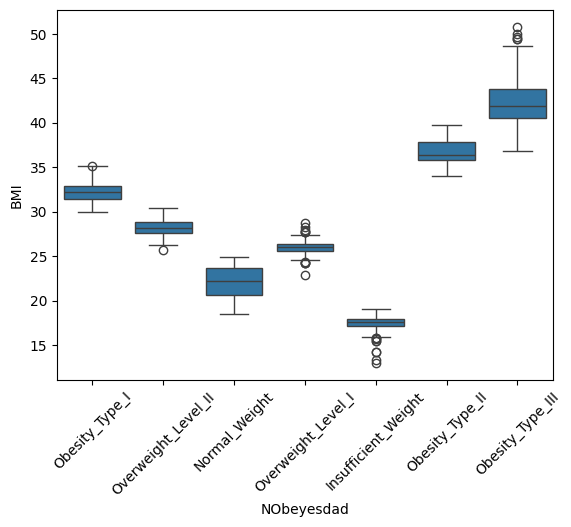

In [24]:
# 여기에 답안코드를 작성하세요
import seaborn as sns
import matplotlib.pyplot as plt

df['BMI'] = df['Weight'] / (df['Height'] ** 2)

sns.boxplot(data=df, x='NObeyesdad', y='BMI')
plt.xticks(rotation=45)
plt.show()

답안03 = 'Obesity_Type_III'

#### 문제 3 해설

이 문제는 기존 변수들을 이용하여 새로운 파생 변수를 생성하고 시각화하는 방법을 다룹니다. 파생 변수는 원본 데이터에는 없지만 기존 변수들의 계산을 통해 만들어지는 새로운 특성으로, 도메인 지식을 활용하여 모델 성능을 향상시킬 수 있습니다.

먼저 BMI(Body Mass Index)라는 파생 변수를 생성합니다. BMI는 체중(kg)을 키(m)의 제곱으로 나눈 값으로 계산되며, 비만도를 나타내는 대표적인 지표입니다. `df['BMI'] = df['Weight'] / (df['Height'] ** 2)`로 새로운 'BMI' 컬럼을 생성하여 데이터프레임에 추가합니다. 이렇게 만들어진 BMI 변수는 키와 몸무게라는 두 개의 원본 변수를 하나의 의미 있는 지표로 통합합니다.

다음으로 seaborn의 `boxplot()`을 사용하여 비만 수준(NObeyesdad)별로 BMI 분포를 시각화합니다. `x='NObeyesdad'`로 x축에 비만 수준을 배치하고, `y='BMI'`로 y축에 방금 생성한 BMI 값을 배치합니다. `plt.xticks(rotation=45)`로 x축 레이블을 45도 회전시켜 겹치지 않게 표시합니다.

그래프를 보면 비만 수준이 높아질수록 BMI 중앙값도 증가하는 명확한 경향을 확인할 수 있습니다. Insufficient_Weight가 가장 낮은 BMI를 보이고, Obesity_Type_III가 가장 높은 BMI를 보입니다. 이는 파생 변수 BMI가 비만 수준을 잘 반영하고 있음을 의미합니다. 그래프에서 가장 높은 비만 수준 클래스는 'Obesity_Type_III'입니다.

4. 수치형 변수들 간의 상관관계를 히트맵으로 시각화하세요.
    - 대상 컬럼: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, BMI
    - 위 컬럼들만 선택하여 상관계수 행렬을 계산하세요.
    - seaborn의 heatmap을 사용하여 시각화하세요.
    - annot=True, fmt='.2f', cmap='coolwarm' 파라미터를 사용하세요.
    - 상관계수 행렬에서 Weight와 가장 높은 양의 상관관계를 가진 변수명(Weight 자신 제외)을 '답안04'에 대입하세요.(예: 답안04 = 'Height')


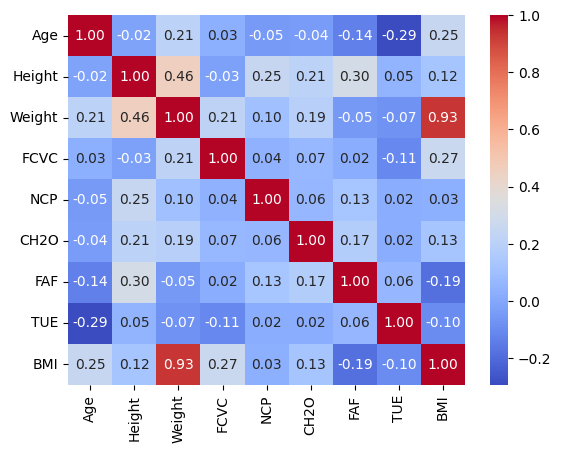

In [25]:
# 여기에 답안코드를 작성하세요
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

답안04 = 'BMI'

#### 문제 4 해설

이 문제는 수치형 변수들 간의 상관관계를 히트맵으로 시각화하는 방법을 다룹니다. 히트맵은 상관계수 행렬을 색상으로 표현하여 변수 간 관계를 직관적으로 파악할 수 있게 합니다.

먼저 분석할 수치형 변수들의 이름을 리스트로 만듭니다. 여기서는 Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, BMI 총 9개의 변수를 선택합니다. 이 중 BMI는 앞서 생성한 파생 변수입니다.

`df[num_cols].corr()`로 선택된 변수들 간의 상관계수 행렬을 계산합니다. 이 행렬은 각 변수 쌍의 상관계수를 포함하며, 대각선은 자기 자신과의 상관계수이므로 1.00입니다.

`sns.heatmap()`으로 상관계수 행렬을 시각화합니다. `annot=True`는 각 셀에 상관계수 값을 표시하고, `fmt='.2f'`는 소수점 둘째 자리까지 표시하며, `cmap='coolwarm'`는 파란색(음의 상관)에서 빨간색(양의 상관)으로 변하는 색상 팔레트를 사용합니다.

히트맵을 보면 Weight와 BMI가 0.93으로 가장 강한 양의 상관관계를 보입니다. 이는 BMI가 체중을 기반으로 계산되기 때문에 당연한 결과입니다. Height와 Weight도 0.46의 중간 정도 양의 상관관계를 보입니다. 상관계수 행렬에서 Weight와 가장 높은 양의 상관관계를 가진 변수는 'BMI' 다음으로 'Height'입니다.

5. 교통수단(MTRANS) 사용에 따른 신체 활동 빈도(FAF)의 차이를 시각화하고 분석하세요.
    - seaborn의 barplot을 사용하여 교통수단별 FAF 평균값을 표시하세요.
    - x축은 MTRANS, y축은 FAF로 설정하세요.
    - `plt.xticks(rotation=45)`로 x축 레이블을 45도 회전시키세요.
    - 그래프를 보고 FAF 평균값이 가장 높은 교통수단을 '답안05' 변수에 대입하세요.(예: 답안05 = 'Walking')


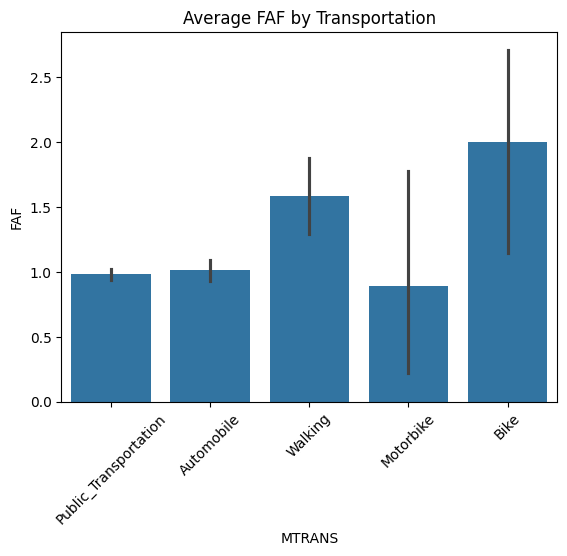

In [26]:
# 여기에 답안코드를 작성하세요
sns.barplot(data=df, x='MTRANS', y='FAF')
plt.xticks(rotation=45)
plt.title('Average FAF by Transportation')
plt.show()

답안05 = 'Bike'

#### 문제 5 해설

이 문제는 범주형 변수별로 수치형 변수의 평균을 비교하는 막대그래프를 그리는 방법을 다룹니다. `barplot()`은 임의의 범주형 변수 각 범주에서 별도로 지정된 수치형 변수의 평균값과 신뢰구간을 자동으로 계산하여 표시합니다. countplot과는 차이가 있음을 유념해야 합니다.

`sns.barplot()`에서 `x='MTRANS'`로 x축에 교통수단을 배치하고, `y='FAF'`로 y축에 신체 활동 빈도를 배치합니다. seaborn의 barplot은 기본적으로 각 범주에 대해 y값의 평균을 계산하고, 오차 막대로 95% 신뢰구간을 표시합니다.

`plt.xticks(rotation=45)`로 x축 레이블을 45도 회전시켜 겹치지 않게 표시하고, `plt.title()`로 그래프에 제목을 추가합니다.

그래프를 보면 교통수단별로 평균 FAF 값이 다르게 나타납니다. Bike가 약 2.0으로 가장 높은 평균 FAF를 보이고, Walking이 약 1.6, Automobile과 Public_Transportation이 약 1.0, Motorbike가 가장 낮은 약 0.9를 보입니다. 이는 자전거를 이용하는 사람들이 평균적으로 더 높은 신체 활동 빈도를 가지고 있음을 의미합니다. 따라서 가장 높은 평균 FAF를 가진 교통수단은 'Bike'입니다.

6. 데이터를 학습에 적합한 형태로 준비하고 train/valid 세트로 분리하세요.
    - ID는 식별자일 뿐 예측에 도움이 되지 않으므로 ID 컬럼을 제거하세요.
    - ID 컬럼이 제거된 결과를 df_model에 저장하세요.
    - df_model에서 타겟 변수를 y에 대입하고, 나머지를 X에 대입하세요.
    - 이후 다음 조건으로 train/valid 세트를 분리하세요:
        - train_test_split 사용
        - 훈련:검증 = 80:20
        - random_state=42
        - 변수명: X_train, X_valid, y_train, y_valid
    - X_train의 샘플 개수를 '답안06'에 대입하세요.



In [27]:
# 여기에 답안코드를 작성하세요
from sklearn.model_selection import train_test_split

# ID 컬럼 삭제
df_model = df.drop('ID', axis=1)

# X, y  분리
y = df_model['NObeyesdad']
X = df_model.drop('NObeyesdad', axis=1)

# train/valid 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

답안06 = 1672

#### 문제 6 해설

이 문제는 데이터를 학습 세트와 검증 세트로 분리하는 방법을 다룹니다. 머신러닝에서 데이터 분리는 전처리 작업 이전에 수행하는 것이 기본 원칙입니다. 이는 매우 중요한 규칙으로, 학습 데이터에서 계산된 통계량(평균, 표준편차, 최빈값 등)을 검증 데이터에 그대로 적용해야 데이터 유출을 방지하고 올바른 평가가 가능하기 때문입니다.

먼저 ID 컬럼을 제거합니다. ID는 단순 식별자로 모델 학습에 도움이 되지 않으므로 `drop('ID', axis=1)`로 제거하여 df_model에 저장합니다.

다음으로 타겟 변수 y와 특성 변수 X를 분리합니다. `df_model['NObeyesdad']`로 타겟 변수를 추출하여 y에 저장하고, `df_model.drop('NObeyesdad', axis=1)`로 타겟 컬럼을 제거한 나머지를 X에 저장합니다.

`train_test_split()` 함수로 데이터를 분리합니다. `test_size=0.2`는 전체 데이터의 20%를 검증 데이터로 사용한다는 의미이고, `random_state=42`는 재현 가능한 결과를 위해 난수 시드를 고정합니다. 이 함수는 X_train, X_valid, y_train, y_valid 네 개의 데이터셋을 반환합니다.

이제 이후의 모든 전처리 작업(결측치 처리, 스케일링, 인코딩 등)은 X_train의 통계량을 기준으로 수행하고, 같은 기준을 X_valid에도 적용해야 합니다.

## 데이터 전처리

7. 아래 가이드를 따라 결측치를 처리하세요.
    - 대상 데이터 프레임: X_train, X_valid
    - X_train의 결측치 현황을 확인하세요.
    - 범주형 변수의 결측치는 X_train의 최빈값(mode)으로 대체하세요.
    - 수치형 변수의 결측치는 X_train의 중앙값(median)으로 대체하세요.
    - 중요: X_valid의 결측치도 X_train에서 계산한 최빈값/중앙값으로 대체하세요.
    - 결측치 처리 결과를 각각 X_train, X_valid에 저장하세요. (덮어쓰기)
    - 결측치 처리 전 X_train의 전체 결측치 개수를 '답안07'에 대입하세요.


In [28]:
# 여기에 답안코드를 작성하세요
print("X_train 결측치 현황:")
print(X_train.isnull().sum())

# 결측치 처리 전 개수 저장
답안07 = X_train.isnull().sum().sum()

# 범주형: X_train의 최빈값으로 대체
cat_cols = X_train.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode_val)
    X_valid[col] = X_valid[col].fillna(mode_val)

# 수치형: X_train의 중앙값으로 대체
num_cols = X_train.select_dtypes(include='number').columns
for col in num_cols:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)
    X_valid[col] = X_valid[col].fillna(median_val)

print(f"\n결측치 처리 후:")
print(f"X_train: {X_train.isnull().sum().sum()}개")
print(f"X_valid: {X_valid.isnull().sum().sum()}개")

X_train 결측치 현황:
Gender                             39
Age                                48
Height                             51
Weight                             51
family_history_with_overweight     67
FAVC                               53
FCVC                               80
NCP                                63
CAEC                              101
SMOKE                              33
CH2O                               89
SCC                                48
FAF                               104
TUE                                82
CALC                              118
MTRANS                             69
BMI                               102
dtype: int64

결측치 처리 후:
X_train: 0개
X_valid: 0개


#### 문제 7 해설

이 문제는 결측치를 확인하고 처리하는 방법을 다룹니다. 앞서 강조한 것처럼 데이터 분리 후 전처리를 수행하므로, 학습 데이터의 통계량(최빈값, 중앙값)을 계산하여 학습 데이터와 검증 데이터 모두에 적용해야 합니다.

먼저 `X_train.isnull().sum()`으로 각 열의 결측치 개수를 확인합니다. 출력 결과를 보면 Gender에 39개, Age에 48개, Height에 51개 등 여러 열에 결측치가 있음을 알 수 있습니다.

결측치 처리 전 전체 결측치 개수를 확인합니다. `X_train.isnull().sum().sum()`으로 모든 열의 결측치를 합산하면 답안07에 저장할 값을 얻을 수 있습니다.

범주형 변수의 결측치는 최빈값으로 대체합니다. `select_dtypes(include='object')`로 범주형 컬럼을 선택하고, 각 컬럼에 대해 `X_train[col].mode()[0]`로 학습 데이터의 최빈값을 계산합니다. 이 최빈값을 `fillna()`로 X_train과 X_valid 모두에 적용합니다. 학습 데이터의 최빈값을 검증 데이터에도 사용하는 것이 핵심입니다.

수치형 변수의 결측치는 중앙값으로 대체합니다. `select_dtypes(include='number')`로 수치형 컬럼을 선택하고, 각 컬럼에 대해 `X_train[col].median()`으로 학습 데이터의 중앙값을 계산합니다. 이 중앙값을 `fillna()`로 X_train과 X_valid 모두에 적용합니다.

처리 후 결측치를 확인하면 X_train과 X_valid 모두 0개가 나옵니다. 이는 모든 결측치가 성공적으로 처리되었음을 의미합니다.

8. 범주형 변수 인코딩을 수행합니다. 아래 가이드를 따라 인코딩하세요.
    - 대상 데이터프레임: X_train, X_valid
    - 2개 클래스를 가진 범주형 변수: LabelEncoder 사용
        - Gender, family_history_with_overweight, FAVC, SMOKE, SCC 컬럼에 적용
        - 각 컬럼별로 LabelEncoder 객체를 X_train에 fit하고 X_train, X_valid 모두 transform
    - 3개 이상 클래스를 가진 범주형 변수: CAEC, CALC, MTRANS 컬럼을 원-핫 인코딩하세요.
        - 중요: 인코딩 후 X_train과 X_valid의 컬럼 개수가 동일해야 합니다.
    - 처리 결과를 각각 X_train, X_valid에 저장하세요. (덮어쓰기)
    - X_train의 컬럼 개수를 '답안08'에 대입하세요.


In [30]:
# 여기에 답안코드를 작성하세요
from sklearn.preprocessing import LabelEncoder

# 2개 클래스 변수: LabelEncoder
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_valid[col] = le.transform(X_valid[col])

# 3개 이상 클래스 변수: 원-핫 인코딩
multi_cols = ['CAEC', 'CALC', 'MTRANS']

# 방법 1: pd.get_dummies를 올바르게 사용
X_combined = pd.concat([X_train, X_valid], axis=0)
X_combined = pd.get_dummies(X_combined, columns=multi_cols, dtype=int)
X_train = X_combined.iloc[:len(X_train)].copy()
X_valid = X_combined.iloc[len(X_train):].copy()

# 방법 2: OneHotEncoder 사용 (대안)
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False, dtype=int)
# ohe.fit(X_train[multi_cols])
# train_encoded = ohe.transform(X_train[multi_cols])
# valid_encoded = ohe.transform(X_valid[multi_cols])
# encoded_cols = ohe.get_feature_names_out(multi_cols)
# X_train = X_train.drop(multi_cols, axis=1)
# X_valid = X_valid.drop(multi_cols, axis=1)
# X_train = pd.concat([X_train, pd.DataFrame(train_encoded, columns=encoded_cols, index=X_train.index)], axis=1)
# X_valid = pd.concat([X_valid, pd.DataFrame(valid_encoded, columns=encoded_cols, index=X_valid.index)], axis=1)

print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"컬럼 일치 여부: {list(X_train.columns) == list(X_valid.columns)}")
# X_train shape: (1672, 27)
# X_valid shape: (419, 27)
# 컬럼 일치 여부: True

답안08 = 27

X_train shape: (1672, 27)
X_valid shape: (419, 27)
컬럼 일치 여부: True


#### 문제 8 해설

이 문제는 범주형 변수를 인코딩하는 방법을 다룹니다. 특히 이 문제는 데이터 분리 후 인코딩 시 발생할 수 있는 중요한 문제를 보여주는 핵심 문제입니다.

먼저 2개 클래스를 가진 이진 범주형 변수들은 `LabelEncoder`로 처리합니다. Gender, family_history_with_overweight, FAVC, SMOKE, SCC 컬럼에 대해 학습 데이터에 `fit_transform()`을 적용하여 인코더를 학습시키고 변환하며, 검증 데이터에는 `transform()`만 적용하여 학습 데이터와 동일한 기준으로 변환합니다.

3개 이상의 클래스를 가진 범주형 변수는 원-핫 인코딩으로 처리해야 합니다. 여기서 CAEC, CALC, MTRANS 세 컬럼이 해당됩니다. 이때 매우 중요한 문제가 발생합니다.

만약 X_train과 X_valid에 각각 `pd.get_dummies()`를 적용하면 어떻게 될까요? X_train은 27개 컬럼, X_valid는 26개 컬럼만 생성됩니다. 이유는 CALC 변수 때문입니다. `X_train['CALC'].value_counts()`를 보면 'Always' 범주가 1개만 존재하지만, `X_valid['CALC'].value_counts()`에는 'Always' 범주가 아예 없습니다. 이렇게 되면 X_train에는 'CALC_Always' 컬럼이 생성되지만 X_valid에는 생성되지 않아 컬럼 개수가 달라지고, 모델 학습과 예측이 불가능해집니다.

이 문제를 해결하기 위해 방법 1에서는 X_train과 X_valid를 `pd.concat()`으로 임시로 합친 후 `pd.get_dummies()`를 적용하고, 다시 분리하는 방법을 사용합니다. 이렇게 하면 모든 범주가 포함되어 양쪽 데이터셋의 컬럼 구조가 동일해집니다.

실무에서는 방법 2처럼 `OneHotEncoder`를 사용하는 것이 표준입니다. OneHotEncoder는 학습 데이터에 fit한 범주를 기억하여 검증 데이터에도 동일한 컬럼을 생성합니다. 하지만 OneHotEncoder는 넘파이 배열을 반환하므로 이를 다시 데이터프레임으로 변환하고 원본 데이터프레임과 결합하는 과정이 번거롭습니다. 따라서 시험 환경에서는 방법 1이 더 간편합니다.

참고로 만약 모든 범주가 X_train과 X_valid에 골고루 분포되어 있다면 각각 `get_dummies()`를 적용해도 문제가 없습니다. 하지만 실제 데이터에서는 특정 범주가 한쪽에만 존재하는 경우가 언제든 발생할 수 있으므로 데이터 전처리 전에 학습, 검증 데이터를 나눈 경우라면 꼭 신경써서 처리해야 합니다.

최종적으로 X_train의 컬럼 개수는 27개입니다.

9. 타겟 변수(y_train, y_valid)도 인코딩합니다.
    - LabelEncoder를 사용하여 y_train을 숫자로 변환하고 y_train에 저장하세요. (덮어쓰기)
    - 같은 LabelEncoder로 y_valid도 변환하여 y_valid에 저장하세요. (덮어쓰기)
    - y_train의 총합을 '답안09'에 대입하세요.


In [31]:
# 여기에 답안코드를 작성하세요
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_valid = le_y.transform(y_valid)

답안09 = sum(y_train) # 5019

#### 문제 9 해설

이 문제는 타겟 변수를 인코딩하는 방법을 다룹니다. 타겟 변수 y는 다중 클래스 분류 문제의 레이블로, 문자열 형태를 숫자로 변환해야 합니다. 이때 `LabelEncoder`를 사용하는 것이 적합합니다.

`LabelEncoder`는 범주를 0부터 시작하는 연속된 정수로 변환합니다. 타겟 변수에 LabelEncoder를 사용하는 것은 올바른 방법입니다. 그래서 이름이 LabelEncoder인 것입니다. 특성 변수(X의 컬럼)에 LabelEncoder를 사용하는 것은 권장되는 방법이 아닙니다. 하지만 편의상 많이 사용됩니다.

먼저 `LabelEncoder()` 객체를 생성하고, `fit_transform()`을 y_train에 적용하여 인코더를 학습시키고 변환합니다. 이 과정에서 y_train의 고유한 클래스들이 0부터 시작하는 정수로 매핑됩니다. y_valid에는 `transform()`만 적용하여 y_train과 동일한 매핑 기준으로 변환합니다.

`sum(y_train)`으로 변환된 y_train의 합계를 계산하면 5019가 나옵니다. 이 값은 y_train의 클래스 개수입니다.

10. 수치형 변수를 스케일링합니다.
    - MinMaxScaler를 사용하세요.
    - 수치형 컬럼: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, BMI
    - X_train에 fit하고 X_train, X_valid 모두 transform하세요.
    - 스케일된 데이터는 X_train, X_valid에 저장하세요. (덮어쓰기)
    - 스케일 후 X_train의 Age 변수의 평균값을 '답안10'에 대입하세요. 반올림하여 소수 셋째자리까지 계산하세요.(예: 답안10=0.045)



In [32]:
# 여기에 답안코드를 작성하세요
from sklearn.preprocessing import MinMaxScaler

# 수치형 컬럼 정의 (BMI 포함)
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])

print(f"Age 평균: {X_train['Age'].mean()}")

답안10 = round(X_train['Age'].mean(), 3) # 0.221

Age 평균: 0.2206155644405986


#### 문제 10 해설

이 문제는 수치형 변수를 스케일링하는 방법을 다룹니다. `MinMaxScaler`는 모든 값을 0과 1 사이로 변환하는 정규화 방법으로, 특성들의 범위를 통일할 때 유용합니다.

먼저 스케일링할 수치형 컬럼들을 리스트로 정의합니다. Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, BMI 총 9개의 컬럼을 선택합니다. BMI는 앞서 생성한 파생 변수입니다.

`MinMaxScaler()` 객체를 생성하고, `fit()`을 X_train의 수치형 컬럼에만 적용하여 각 컬럼의 최솟값과 최댓값을 학습합니다. 이후 `transform()`을 X_train과 X_valid 모두에 적용하여 학습된 최솟값과 최댓값을 기준으로 데이터를 변환합니다. X_valid에 `fit_transform()` 하지 않도록 주의합니다.

스케일링 후에는 원본 데이터프레임의 해당 컬럼들을 변환된 값으로 교체합니다. `X_train[num_cols] = scaler.transform(X_train[num_cols])`처럼 인덱싱으로 직접 할당하면 원본 데이터프레임의 해당 컬럼만 업데이트됩니다.

스케일링 후 X_train의 'Age' 컬럼 평균값을 계산하고 소수점 셋째 자리까지 반올림하면 약 0.221이 나옵니다.

## 모델링 및 평가

11. 전처리된 데이터로 머신러닝 모델링을 수행합니다. 아래 가이드를 따라 의사결정나무(decision tree), XGBoost 모델을 만들고 학습을 진행하세요.

- 의사결정나무(DecisionTreeClassifier)
    - 트리의 최대 깊이 : 10으로 설정
    - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 5로 설정
    - random_state : 42로 설정
    - 의사결정나무 모델을 dt 변수에 저장해 주세요.

- XGBoost(XGBClassifier)
    - 트리의 최대 깊이(max_depth) : 5로 설정
    - 트리 개수(n_estimators) : 100으로 설정
    - 학습률(learning_rate) : 0.1로 설정
    - random_state : 42로 설정
    - XGBoost 모델을 xgb 변수에 저장해 주세요.

- 위의 2개의 모델에 대해 fit을 활용해 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.


In [33]:
# 여기에 답안코드를 작성하세요
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# 의사결정나무
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

#### 문제 11 해설

이 문제는 전처리된 데이터로 머신러닝 모델을 생성하고 학습하는 방법을 다룹니다. 의사결정나무와 XGBoost는 트리 기반 알고리즘으로, 다중 클래스 분류 문제에서 자주 사용됩니다.

먼저 필요한 클래스를 import합니다. `DecisionTreeClassifier`는 단일 의사결정나무를, `XGBClassifier`는 XGBoost 알고리즘을 구현합니다. XGBoost는 여러 개의 의사결정나무를 순차적으로 학습하여 앙상블하는 부스팅 방법입니다.

문제에서 지정한 하이퍼 파라미터를 설정합니다. 그래디언트 부스팅과  XGBoost 모델은 각 트리의 기여도를 조절하는 학습률 `learning_rate=0.1`을 지정할 수 있습니다.

두 모델 모두 같은 훈련 데이터로 학습하므로, 이후 검증 데이터로 성능을 비교할 수 있습니다.

12. 위 의사결정나무와 XGBoost 모델의 성능을 평가하려고 합니다. 아래 가이드에 따라 평가하세요.

- 성능 평가는 검증 데이터셋을 활용하세요.

- 11번 문제에서 만든 XGBoost 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.

- sklearn.metrics의 confusion_matrix를 사용하여 혼동행렬을 생성하세요.
    - 파라미터: (y_valid, y_pred) 순서로 입력
    - 결과를 cm 변수에 저장하세요.

- sklearn.metrics의 classification_report를 사용하여 분류 리포트를 생성하세요.
    - 파라미터: (y_valid, y_pred) 순서로 입력
    - output_dict=True 옵션을 사용하여 딕셔너리 형태로 저장하세요.
    - 결과를 report 변수에 저장하세요.

- cm을 '답안12_1'에 대입하세요.
- report를 '답안12_2'에 대입하세요.


In [34]:
# 여기에 답안코드를 작성하세요
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xgb.predict(X_valid)

# 혼동행렬
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# 분류 리포트
report = classification_report(y_valid, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

답안12_1 = cm
답안12_2 = report

Confusion Matrix:
[[58  1  0  0  0  1  1]
 [ 0 52  0  0  0  0  0]
 [ 0  0 63  0  0  2  1]
 [ 0  0  0 56  1  0  0]
 [ 0  0  1  0 52  0  0]
 [ 0  3  0  0  0 54  2]
 [ 0  0  2  0  0  0 69]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.93      1.00      0.96        52
           2       0.95      0.95      0.95        66
           3       1.00      0.98      0.99        57
           4       0.98      0.98      0.98        53
           5       0.95      0.92      0.93        59
           6       0.95      0.97      0.96        71

    accuracy                           0.96       419
   macro avg       0.97      0.97      0.96       419
weighted avg       0.96      0.96      0.96       419



#### 문제 12 해설

이 문제는 다중 클래스 분류 모델의 성능을 평가하는 방법을 다룹니다. 혼동행렬과 분류 리포트는 모델이 각 클래스를 얼마나 잘 예측하는지 상세하게 보여줍니다.

먼저 XGBoost 모델로 검증 데이터에 대한 예측을 수행합니다. `predict()` 메서드에 `X_valid`를 전달하면 각 샘플의 예측 클래스를 반환합니다.

`confusion_matrix()` 함수로 혼동행렬을 생성합니다. 실제값 `y_valid`와 예측값 `y_pred`를 전달하면 행은 실제 클래스, 열은 예측 클래스를 나타내는 행렬이 만들어집니다. 대각선 값은 올바르게 예측한 샘플 수이고, 비대각선 값은 잘못 예측한 샘플 수입니다. 출력 결과를 보면 대부분의 클래스에서 높은 대각선 값을 보이며, 이는 모델이 전반적으로 좋은 성능을 보임을 의미합니다.

`classification_report()` 함수로 분류 리포트를 생성합니다. `output_dict=True`를 지정하면 딕셔너리 형태로 결과를 반환합니다. 분류 리포트는 각 클래스별로 precision(정밀도), recall(재현율), f1-score(정밀도와 재현율의 조화평균)를 제공하며, 전체 모델의 accuracy, macro avg, weighted avg도 포함합니다.

출력 결과를 보면 모든 클래스에서 0.93 이상의 높은 성능을 보이며, 전체 accuracy는 0.96으로 매우 우수합니다.

13. 딥러닝 모델링
    - 딥러닝 모델링은 다음 조건을 사용하시오.
        - 히든 레이어 3개 이상 사용, 활성함수 relu
        - Dropout 레이어 2개 이상 사용, 드롭아웃 비율 0.3
        - 출력층 활성화 함수: softmax
        - 손실함수: sparse_categorical_crossentropy를 문자열 형태로 사용하시오.
        - 매트릭: accuracy
        - 옵티마이저: adam, lr=0.001
        - 에폭: 50
        - 배치사이즈: 32
        - 각 에폭마다 `X_valid`, `y_valid`를 써서 검증을 수행하시오.
        - 학습 정보를 `history` 변수에 저장하시오.
        - early stop 콜백:
            - `val_accuracy` 기준
            - `patience=5`로 적용
        - checkpoint 콜백:
            - 파일경로: `checkpoint.keras`,
            - `val_accuracy` 모니터링
            - `save_best_only=True`

    - 학습이 종료된후 모델 변수를 답안13_1에 대입하시오.
    - 학습이 종료된후 `history.history` 변수를 답안13_2에 대입하시오.


In [35]:
# 여기에 답안코드를 작성하세요
import tensorflow as tf

# 출력층 뉴런 개수로 사용할 클래스 개수 확인
num_classes = len(set(y_train))

# 모델 정의
mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 옵티마이저
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 콜백
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5)

chpt_callback = tf.keras.callbacks.ModelCheckpoint(
    'checkpoint.keras', monitor='val_accuracy', save_best_only=True)

# 컴파일
mlp.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 학습
history = mlp.fit(X_train, y_train,
                  epochs=50, batch_size=32,
                  validation_data=(X_valid, y_valid),
                  callbacks=[es_callback, chpt_callback])

답안13_1 = mlp
답안13_2 = history.history

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3166 - loss: 1.6733 - val_accuracy: 0.5394 - val_loss: 1.0493
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5634 - loss: 0.9785 - val_accuracy: 0.7160 - val_loss: 0.7749
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6214 - loss: 0.8725 - val_accuracy: 0.7566 - val_loss: 0.6528
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6777 - loss: 0.7554 - val_accuracy: 0.7685 - val_loss: 0.6628
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.7203 - val_accuracy: 0.8115 - val_loss: 0.5706
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7597 - loss: 0.6302 - val_accuracy: 0.8329 - val_loss: 0.5060
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7746 - loss: 0.5817 - val_accuracy: 0.7637 - val_loss: 0.5841
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7604 - loss: 0.6371 - val_accuracy: 0.8329 - val_loss:

14. 성능 평가
    - 학습 후 저장된 체크포인트를 모델에 로딩하고 검증 데이터 셋에 대해 성능을 평가하시오.
        - 평가 후 검증세트에 대한 accuracy를 소수 4째 자리까지 반올림하여 `답안14_1`에 대입하시오.

    - history에 저장된 수치들을 시각화 하시오.
        - loss, accuracy의 그래프를 1행 2열인 `fig`, `ax` 변수에 만들어 각각 표시하시오.
        - 왼쪽 그래프에 `loss`, `val_loss`를 오른쪽 그래프에 `accuracy`, `val_accuracy`를 표시하시오.
        - 학습과 검증의 범례를 표시하시오.
        - 그래프의 제목은 'Loss by epoch', 'Accuracy by epoch'으로 하시오.
        - 그래프의 X축 이름은 `epochs`, Y축 이름은 각각 'loss', 'accuracy'로 표시하시오.
        - 시각화를 완료한 후 `fig`변수를 `답안14_2`에 대입하시오.


In [36]:
# 여기 코드를 작성하시오: 모델 체크포인트를 로딩하고 평가를 수행하시오.
mlp.load_weights('checkpoint.keras')

result = mlp.evaluate(X_valid, y_valid)
답안14_1 = round(result[1], 4)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8842 - loss: 0.3711 


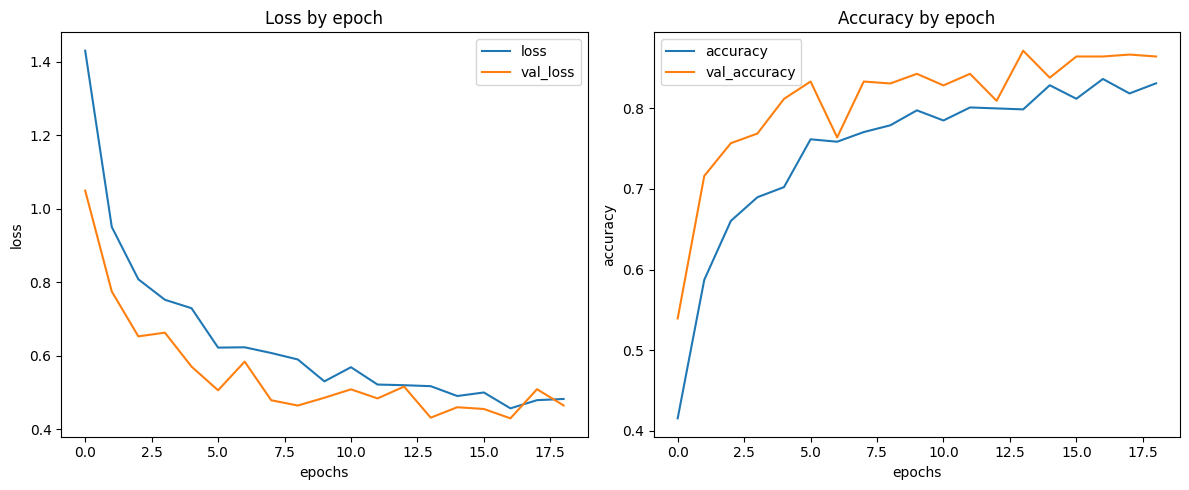

In [37]:
# 여기 코드를 작성하시오: 학습 과정을 시각화 하시오.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].legend()
ax[0].set_title('Loss by epoch')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_title('Accuracy by epoch')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')

plt.tight_layout()
plt.show()

답안14_2 = fig


#### 문제 13, 14 해설

이 문제들은 딥러닝 모델을 정의하고 학습한 후 성능을 평가하는 전체 과정을 다룹니다. 다중 클래스 분류를 위한 딥러닝 모델 구축 과정은 이진 분류나 회귀와 유사하지만, 출력층과 손실 함수에서 차이가 있습니다.

모델 구조는 Sequential로 구성하며, 3개의 은닉층에 각각 relu 활성화 함수와 Dropout을 사용합니다. 다중 클래스 분류이므로 출력층은 클래스 개수만큼의 뉴런을 가지며 softmax 활성화 함수를 사용합니다. softmax는 각 클래스에 속할 확률을 0~1 사이의 값으로 출력하며, 모든 확률의 합이 1이 됩니다.

손실 함수는 `sparse_categorical_crossentropy`를 사용합니다. 이는 타겟이 정수 형태일 때 사용하는 다중 클래스 분류 손실 함수입니다. 만약 타겟이 원-핫 인코딩되어 있다면 `categorical_crossentropy`를 사용해야 하지만, 우리는 LabelEncoder로 정수로 변환했으므로 sparse 버전을 사용합니다.

학습 곡선을 통해 모델이 에포크를 거치며 어떻게 개선되는지, 과적합이 발생하는지 등을 확인할 수 있습니다.

- 아래 셀을 실행하여 채점하세요.

In [38]:
import importlib

try:
    import aice_ans
    importlib.reload(aice_ans)
    aice_ans.grade_answers(globals())
except ImportError:
    print("🚨 채점 파일을 찾을 수 없습니다.")
    print("왼쪽 사이드바의 '파일 업로드' 버튼을 눌러 채점 파일을 업로드했는지 확인해주세요.")
except Exception as e:
    print(f"🚨 채점 중 예상치 못한 오류가 발생했습니다: {e}")

📁 설정 파일 로드 완료: AICE Associate - Obesity Level 다중 분류 문제
✅ 답안01_1: 정답입니다!
--------------------
✅ 답안01_2: 정답입니다!
--------------------
✅ 답안02: 정답입니다!
--------------------
✅ 답안03: 정답입니다!
--------------------
✅ 답안04: 정답입니다!
--------------------
✅ 답안05: 정답입니다!
--------------------
✅ 답안06: 정답입니다!
--------------------
✅ 답안07: 정답입니다!
--------------------
✅ 답안08: 정답입니다!
--------------------
✅ 답안09: 정답입니다!
--------------------
✅ 답안10: 정답입니다!
--------------------
✅ 답안12_1: 정답입니다! (7x7 confusion matrix)
--------------------
✅ 답안12_2: 정답입니다! (7개 클래스 classification report)
--------------------
✅ 답안13_1: 정답입니다! (Dense: 3개 + 출력층, Dropout: 2개)
--------------------
✅ 답안13_2: 정답입니다! (EarlyStopping 정상 작동, best epoch: 14)
--------------------
✅ 답안14_1: 정답입니다! (값: 0.8711)
--------------------
✅ 답안14_2: 정답입니다!
--------------------

📊 채점 결과: 17/17 정답
📈 점수: 100.0%
